### K-Means Clustering to Create Park Typologies

#### Authors: Eric Englin, Sophie Abo, Mac Lang
#### Date: 7/14/23


**Description**
This code uses a park-level dataset of 2021 recreation visits, size, settings (urban, rural, suburban), and visitation patterns (sporadic, seasonal, sustained). The code uses k-means clustering to create park categories that can be interpreted for typologies. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_excel(r"C:\Users\Jonathan.Robison\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Enhancing Trip Planning Information\Park Typology Dataset 3.xlsx")

In [3]:
df.head()

,NPS Full Name,Simplified Name,Park Alpha,Region,Setting,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Total Parking Area (Acres),Miles of Road/Acre,Acre of Parking/Acre,Transit Y/N,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,ABLI,SER,rural,3235,14867,265707,1939,6534,...,1.503191,0.002441,0.004363,0,0,NaN,NaN,NaN,NaN,NaN
1,Acadia National Park,Acadia,ACAD,NER,rural,2260,55478,3970260,8532,9154,...,40.037856,0.001938,0.000816,1,414808,NaN,NaN,NaN,1.0,NaN
2,Adams National Historical Park,Adams,ADAM,NER,urban,101636,725981,12848,27,179,...,0.000000,0.000000,0.000000,1,0,NaN,NaN,NaN,NaN,NaN
3,African Burial Ground National Monument,African Burial Ground,AFBG,NER,urban,1694251,1694251,29743,96,1571,...,0.000000,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN,NaN
4,Agate Fossil Beds National Monument,Agate Fossil Beds,AGFO,MWR,rural,239,35872,16357,0,94,...,1.922567,0.001270,0.000629,0,0,NaN,NaN,NaN,NaN,NaN


In [4]:
column_titles = df.columns
print(column_titles)

Index([                     'NPS Full Name',
                          'Simplified Name',
                               'Park Alpha',
                                   'Region',
                                  'Setting',
              '2020 Gateway Community Pop.',
                    '2020 Park County Pop.',
                                       2022,
                                   'Jan-19',
                                   'Feb-19',
                                   'Mar-19',
                                   'Apr-19',
                                   'May-19',
                                   'Jun-19',
                                   'Jul-19',
                                   'Aug-19',
                                   'Sep-19',
                                   'Oct-19',
                                   'Nov-19',
                                   'Dec-19',
                            'Avg 2003-2022',
                               'Peak Month',
          

In [5]:
#2022 column title not displaying correctly, fixing

df.rename(columns={2022:'2022'},
    inplace=True)

print("\nDataFrame after renaming columns:")
print(df)


DataFrame after renaming columns:
                                         NPS Full Name  \
0    Abraham Lincoln Birthplace National Historical...   
1                                 Acadia National Park   
2                       Adams National Historical Park   
3              African Burial Ground National Monument   
4                  Agate Fossil Beds National Monument   
..                                                 ...   
383                          Wupatki National Monument   
384                          Yellowstone National Park   
385                             Yosemite National Park   
386             Yukon-Charley Rivers National Preserve   
387                                 Zion National Park   

                Simplified Name Park Alpha Region Setting  \
0    Abraham Lincoln Birthplace       ABLI    SER   rural   
1                        Acadia       ACAD    NER   rural   
2                         Adams       ADAM    NER   urban   
3         African Burial

In [6]:
column_titles = df.columns
print(column_titles)

Index(['NPS Full Name', 'Simplified Name', 'Park Alpha', 'Region', 'Setting',
       '2020 Gateway Community Pop.', '2020 Park County Pop.', '2022',
       'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19',
       'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19', 'Avg 2003-2022',
       'Peak Month', 'Avg Month 2003-22', 'Peak/Average', 'Size  (acres)',
       'Have Roads Y/N?', 'Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings',
       'Access Type', 'Recent Trans Data Collection Study', 'Hrly VUStats',
       'FOTSC park', 'remove'],
      dtype='object')


In [7]:
#removing AKR and NCR parks from dataset
df = df.loc[~df['Region'].isin(['NCR','AKR'])]

print(df)

                                         NPS Full Name  \
0    Abraham Lincoln Birthplace National Historical...   
1                                 Acadia National Park   
2                       Adams National Historical Park   
3              African Burial Ground National Monument   
4                  Agate Fossil Beds National Monument   
..                                                 ...   
382                  Wright Brothers National Memorial   
383                          Wupatki National Monument   
384                          Yellowstone National Park   
385                             Yosemite National Park   
387                                 Zion National Park   

                Simplified Name Park Alpha Region Setting  \
0    Abraham Lincoln Birthplace       ABLI    SER   rural   
1                        Acadia       ACAD    NER   rural   
2                         Adams       ADAM    NER   urban   
3         African Burial Ground       AFBG    NER   urban  

In [8]:
kmeans = KMeans(
    init="random",
     n_clusters=10,
     n_init='auto',
     max_iter=300,
     random_state=42
)


In [9]:
#Changing 'Setting' to make string 0/1 if rural, suburban, or urban setting

one_hot = pd.get_dummies(df['Setting'])
df = df.drop('Setting',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [10]:
df = df.loc[df['remove']!="Yes"]

In [11]:
kmeans.fit(df[['2020 Gateway Community Pop.', '2020 Park County Pop.',
               '2022','Avg 2003-2022','Peak Month','Avg Month 2003-22','Peak/Average',
        'Size  (acres)', 'Have Roads Y/N?','Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=10, n_init='auto', random_state=42)

In [12]:
df.head()

,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,Mar-19,...,Transit Y/N,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,ABLI,SER,3235,14867,265707,1939,6534,14566,...,0,0,NaN,NaN,NaN,NaN,NaN,1,0,0
1,Acadia National Park,Acadia,ACAD,NER,2260,55478,3970260,8532,9154,20161,...,1,414808,NaN,NaN,NaN,1.0,NaN,1,0,0
2,Adams National Historical Park,Adams,ADAM,NER,101636,725981,12848,27,179,253,...,1,0,NaN,NaN,NaN,NaN,NaN,0,0,1
3,African Burial Ground National Monument,African Burial Ground,AFBG,NER,1694251,1694251,29743,96,1571,1395,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,1
4,Agate Fossil Beds National Monument,Agate Fossil Beds,AGFO,MWR,239,35872,16357,0,94,401,...,0,0,NaN,NaN,NaN,NaN,NaN,1,0,0


In [13]:
kmeans.labels_[:5]

array([4, 1, 5, 7, 4])

In [14]:
#running Elbow Graph analysis on correct number of clusters

kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
     "random_state": 42,
   }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df[['2020 Gateway Community Pop.', '2020 Park County Pop.',
               '2022','Avg 2003-2022','Peak Month','Avg Month 2003-22','Peak/Average',
        'Size  (acres)', 'Have Roads Y/N?','Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])
    sse.append(kmeans.inertia_)

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\

In [15]:
sse

[2447975808808371.0,
 1224798762651628.0,
 711268546081296.2,
 596365119126865.6,
 511952371403958.4,
 462329301328769.5,
 439780289188815.75,
 409527338175007.5,
 364185841116615.8,
 352133840409862.4]

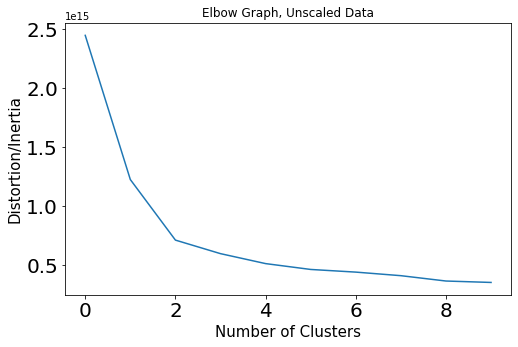

In [16]:
#Displaying Elbow Graph results

fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.set_xlabel('Number of Clusters',fontsize = 15) #xlabel
ax.set_ylabel('Distortion/Inertia',fontsize = 15) #ylabel
ax.tick_params(axis='x', which='major', labelsize=20)
ax.tick_params(axis='y', which='major', labelsize=20)
plt.title ('Elbow Graph, Unscaled Data')
plt.plot(sse)
plt.show()

In [17]:
kmeans = KMeans(
    init="random",
     n_clusters=2,
     n_init=10,
     max_iter=300,
     random_state=42
)
kmeans.fit(df[['2020 Gateway Community Pop.', '2020 Park County Pop.',
               '2022','Avg 2003-2022','Peak Month','Avg Month 2003-22','Peak/Average',
        'Size  (acres)', 'Have Roads Y/N?','Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

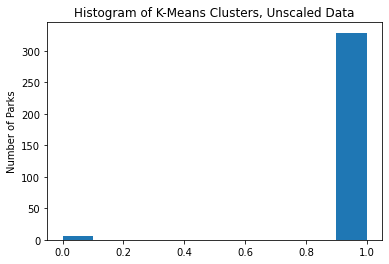

In [18]:
plt.hist(kmeans.labels_)
plt.title("Histogram of K-Means Clusters, Unscaled Data")
plt.xlabel("")
plt.ylabel("Number of Parks")
plt.show()

In [19]:
df['cluster'] = kmeans.labels_

In [20]:
df.head()

,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,Mar-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,ABLI,SER,3235,14867,265707,1939,6534,14566,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,1
1,Acadia National Park,Acadia,ACAD,NER,2260,55478,3970260,8532,9154,20161,...,414808,NaN,NaN,NaN,1.0,NaN,1,0,0,1
2,Adams National Historical Park,Adams,ADAM,NER,101636,725981,12848,27,179,253,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,1
3,African Burial Ground National Monument,African Burial Ground,AFBG,NER,1694251,1694251,29743,96,1571,1395,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,1
4,Agate Fossil Beds National Monument,Agate Fossil Beds,AGFO,MWR,239,35872,16357,0,94,401,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,1


In [21]:
df.to_excel(r"C:\Users\Jonathan.Robison\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Enhancing Trip Planning Information\NPS Park cluster result 24_01_22.xlsx")

In [22]:
df = df.sort_values(by=['cluster']).reset_index()

In [23]:
print(len(df.loc[df['cluster']==0]), " in cluster 0")
df.loc[df['cluster']==0]

6  in cluster 0


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
0,141,Gateway National Recreation Area,Gateway,GATE,NER,495747,9447805,8728291,504178,543132,...,0,NaN,NaN,NaN,1.0,NaN,0,0,1,0
1,162,Great Smoky Mountains National Park,Great Smoky Mountains,GRSM,SER,3577,345865,12937633,496743,421770,...,0,NaN,NaN,NaN,1.0,NaN,0,1,0,0
2,33,Blue Ridge Parkway,Blue Ridge Parkway,BLRI,SER,94589,269452,15711004,346381,472547,...,5138,NaN,NaN,NaN,1.0,NaN,0,1,0,0
3,153,Golden Gate National Recreation Area,Golden Gate,GOGA,PWR,873965,1136286,15638911,858993,1003946,...,1327939,NaN,NaN,NaN,NaN,NaN,0,0,1,0
4,211,Lake Mead National Recreation Area,Lake Mead,LAKE,PWR,14885,2478728,5578226,847,805,...,0,NaN,NaN,NaN,1.0,NaN,1,0,0,0
5,253,Natchez Trace Parkway,Natchez Trace,NATR,SER,37923,833343,6543533,485642,472579,...,0,NaN,NaN,NaN,1.0,NaN,0,1,0,0


In [24]:
print(len(df.loc[df['cluster']==1]), " in cluster 1")
df.loc[df['cluster']==1]

329  in cluster 1


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
6,262,Nez Perce National Historical Park,Nez Perce,NEPE,PWR,1169,42090,344517,14700,59754,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,1
7,261,New River Gorge National Park and Preserve,New River Gorge,NERI,NER,90,52447,1593523,3853,5903,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,1
8,260,New Orleans Jazz National Historical Park,New Orleans Jazz,JAZZ,SER,383997,383997,37410,400,3802,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,1
9,259,New Bedford Whaling National Historical Park,New Bedford Whaling,NEBE,NER,101079,579200,13570,26238,33155,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,1
10,258,Navajo National Monument,Navajo,NAVA,IMR,494,106717,41118,113,1397,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,122,Fort Point National Historic Site,Fort Point,FOPO,PWR,873965,873965,955454,40541,57164,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,1
331,121,Fort Necessity National Battlefield,Fort Necessity,FONE,NER,735,128804,258293,1607,2268,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,1
332,120,Fort McHenry National Monument and Historic Sh...,Fort McHenry,FOMC,NER,585708,585708,223957,486,18712,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,1
333,118,Fort Larned National Historic Site,Fort Larned,FOLS,MWR,3769,6253,26219,20,620,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,1


In [25]:
print(len(df.loc[df['cluster']==2]), " in cluster 2")
df.loc[df['cluster']==2]

0  in cluster 2


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster


In [26]:
#rerunning K-Means analysis on Cluster 1 of unscaled data

df_c1 = df.loc[df['cluster']==1]

In [27]:
df_c1.head()

df_c1.tail()

,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
330,122,Fort Point National Historic Site,Fort Point,FOPO,PWR,873965,873965,955454,40541,57164,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,1
331,121,Fort Necessity National Battlefield,Fort Necessity,FONE,NER,735,128804,258293,1607,2268,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,1
332,120,Fort McHenry National Monument and Historic Sh...,Fort McHenry,FOMC,NER,585708,585708,223957,486,18712,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,1
333,118,Fort Larned National Historic Site,Fort Larned,FOLS,MWR,3769,6253,26219,20,620,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,1
334,387,Zion National Park,Zion,ZION,IMR,514,245235,4692417,98828,102269,...,4383151,NaN,NaN,NaN,1.0,NaN,1,0,0,1


C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\

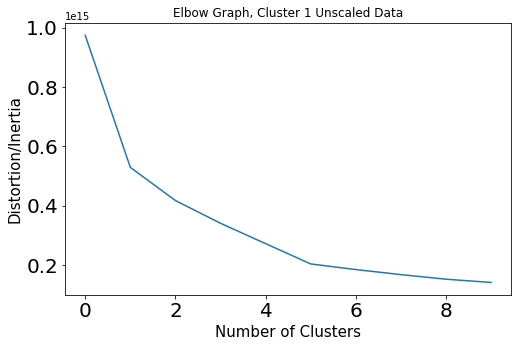

In [28]:
kmeans.fit(df_c1[['2020 Gateway Community Pop.', '2020 Park County Pop.',
               '2022','Avg 2003-2022','Peak Month','Avg Month 2003-22','Peak/Average',
        'Size  (acres)', 'Have Roads Y/N?','Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])

kmeans.labels_[:5]

#running Elbow Graph analysis on correct number of clusters

kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
     "random_state": 42,
   }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_c1[['2020 Gateway Community Pop.', '2020 Park County Pop.',
               '2022','Avg 2003-2022','Peak Month','Avg Month 2003-22','Peak/Average',
        'Size  (acres)', 'Have Roads Y/N?','Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])
    sse.append(kmeans.inertia_)
    
sse

#Displaying Elbow Graph results

fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.set_xlabel('Number of Clusters',fontsize = 15) #xlabel
ax.set_ylabel('Distortion/Inertia',fontsize = 15) #ylabel
ax.tick_params(axis='x', which='major', labelsize=20)
ax.tick_params(axis='y', which='major', labelsize=20)
plt.title ('Elbow Graph, Cluster 1 Unscaled Data')
plt.plot(sse)
plt.show()

In [29]:
kmeans = KMeans(
    init="random",
     n_clusters=5,
     n_init=10,
     max_iter=300,
     random_state=42
)
kmeans.fit(df_c1[['2022', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
       'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
       'Dec-19', 'Avg 2003-2022','Peak Month','Avg Month 2003-22','Peak/Average',
        'Size  (acres)', 'Have Roads Y/N?','Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=5, n_init=10, random_state=42)

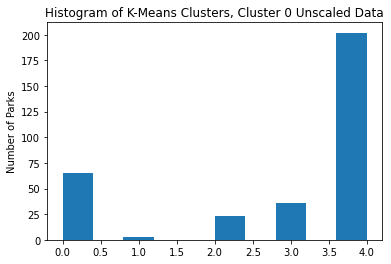

In [30]:
plt.hist(kmeans.labels_)
plt.title("Histogram of K-Means Clusters, Cluster 0 Unscaled Data")
plt.xlabel("")
plt.ylabel("Number of Parks")
plt.show()

In [31]:
df_c1.to_excel(r"C:\Users\Jonathan.Robison\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Enhancing Trip Planning Information\NPS Park cluster result 24_01_22_subcluster.xlsx")

In [32]:
df_c1['cluster'] = kmeans.labels_

df_c1 = df_c1.sort_values(by=['cluster'])


<ipython-input-32-05258284f09c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c1['cluster'] = kmeans.labels_


In [33]:
print(len(df_c1.loc[df_c1['cluster']==0]), "in cluster C1.0")
df_c1.loc[df_c1['cluster']==0]

65 in cluster C1.0


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
6,262,Nez Perce National Historical Park,Nez Perce,NEPE,PWR,1169,42090,344517,14700,59754,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,0
177,62,Cedar Breaks National Monument,Cedar Breaks,CEBR,IMR,51403,57289,688644,15235,4167,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,0
42,244,Mojave National Preserve,Mojave,MOJA,PWR,25415,2181654,773463,4384,25480,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,0
173,66,Channel Islands National Park,Channel Islands,CHIS,PWR,115732,843843,323245,9193,22263,...,80223,NaN,NaN,NaN,NaN,NaN,0,1,0,0
44,242,Mississippi National River and Recreation Area,Mississippi,MISS,MWR,311527,552352,303882,37648,27742,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,31,Biscayne National Park,Biscayne,BISC,SER,80737,2701767,701023,50873,59754,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,0
26,283,Petrified Forest National Park,Petrified Forest,PEFO,IMR,0,172738,505209,15341,21342,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,0
249,28,Big South Fork National River and Recreation Area,Big South Fork,BISO,SER,3787,21850,797726,34256,42159,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,0
235,43,Cabrillo National Monument,Cabrillo,CABR,PWR,1386932,3298634,768076,6806,56248,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,0


In [34]:
print(len(df_c1.loc[df_c1['cluster']==1]), " in cluster 1")
df_c1.loc[df_c1['cluster']==1]

3  in cluster 1


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
270,156,Grand Canyon National Park,Grand Canyon,GRCA,IMR,0,358368,4732101,225056,213050,...,4348518,NaN,NaN,NaN,1.0,NaN,1,0,0,1
149,333,Statue of Liberty National Monument,Statue of Liberty,STLI,NER,1694251,1694251,3141213,155691,154755,...,6993087,NaN,NaN,NaN,NaN,NaN,0,0,1,1
334,387,Zion National Park,Zion,ZION,IMR,514,245235,4692417,98828,102269,...,4383151,NaN,NaN,NaN,1.0,NaN,1,0,0,1


In [35]:
print(len(df_c1.loc[df_c1['cluster']==2]), " in cluster 2")
df_c1.loc[df_c1['cluster']==2]

23  in cluster 2


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
170,385,Yosemite National Park,Yosemite,YOSE,PWR,0,242201,3667550,116746,111665,...,1392562,NaN,NaN,NaN,1.0,NaN,1,0,0,2
15,250,Mount Rushmore National Memorial,Mount Rushmore,MORU,MWR,240,109222,2440449,12933,11743,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,2
260,158,Grand Teton National Park,Grand Teton,GRTE,IMR,1611,23331,2806223,56635,43913,...,238920,NaN,NaN,NaN,1.0,NaN,1,0,0,2
38,270,Olympic National Park,Olympic,OLYM,PWR,19960,251494,2432972,72725,73756,...,0,NaN,NaN,NaN,1.0,NaN,1,0,0,2
107,384,Yellowstone National Park,Yellowstone,YELL,IMR,79,202494,3290242,33896,31650,...,0,NaN,NaN,NaN,1.0,NaN,1,0,0,2
186,50,Cape Hatteras National Seashore,Cape Hatteras,CAHA,SER,1600,41504,2862844,72767,72796,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,2
195,87,Cuyahoga Valley National Park,Cuyahoga Valley,CUVA,MWR,13635,1264817,2913312,88020,82061,...,100481,NaN,NaN,NaN,NaN,NaN,0,1,0,2
58,195,Joshua Tree National Park,Joshua Tree,JOTR,PWR,28065,4599839,3058294,195993,261230,...,0,NaN,NaN,NaN,1.0,NaN,1,0,0,2
179,60,Castle Clinton National Monument,Castle Clinton,CACL,NER,1694251,1694251,3471661,181143,193675,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,2
178,69,Chattahoochee River National Recreation Area,Chattahoochee River,CHAT,SER,108080,1066710,3537848,204389,133850,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,2


In [36]:
print(len(df_c1.loc[df_c1['cluster']==3]), " in cluster 3")
df_c1.loc[df_c1['cluster']==3]

36  in cluster 3


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
116,370,Whiskeytown-Shasta-Trinity National Recreation...,Whiskeytown-Shasta-Trinity,WHIS,PWR,0,198267,1505134,21107,26275,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,3
271,168,Haleakala National Park,Haleakala,HALE,PWR,7297,164754,1087616,53523,83666,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,3
163,318,San Antonio Missions National Historical Park,San Antonio Missions,SAAN,IMR,1434625,2009324,1238920,98469,92155,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,3
222,8,Amistad National Recreation Area,Amistad,AMIS,IMR,34673,47586,912283,64128,70392,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,3
154,327,Sequoia National Park,Sequoia,SEQU,NaN,2053,473117,1153198,36024,28737,...,0,NaN,NaN,NaN,1.0,NaN,1,0,0,3
153,328,Shenandoah National Park,Shenandoah,SHEN,NER,4831,379812,1449300,20245,10264,...,0,NaN,NaN,NaN,1.0,NaN,0,1,0,3
184,53,Capitol Reef National Park,Capitol Reef,CARE,IMR,231,2486,1227608,11893,12368,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,3
251,190,"John D. Rockefeller, Jr., Memorial Parkway","John D. Rockefeller, Jr. Parkway",JODR,IMR,1611,23331,1091196,2518,2518,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,3
125,336,Stonewall National Monument,Stonewall,STON,NER,1694251,1694251,1581961,0,0,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,3
189,72,Chickasaw National Recreation Area,Chickasaw,CHIC,IMR,5065,13904,1455530,46767,63363,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,3


In [37]:
print(len(df_c1.loc[df_c1['cluster']==4]), " in cluster 4")
df_c1.loc[df_c1['cluster']==4]

202  in cluster 4


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
247,30,Bighorn Canyon National Recreation Area,Bighorn Canyon,BICA,IMR,2243,11521,217660,5713,4082,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,4
229,23,Bent's Old Fort National Historic Site,Bent's Old Fort,BEOL,IMR,7322,18690,26057,36,441,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,4
227,2,Adams National Historical Park,Adams,ADAM,NER,101636,725981,12848,27,179,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,4
226,3,African Burial Ground National Monument,African Burial Ground,AFBG,NER,1694251,1694251,29743,96,1571,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,4
258,160,Great Basin National Park,Great Basin,GRBA,PWR,41,9080,142115,689,1060,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,67,Charles Pinckney National Historic Site,Charles Pinckney,CHPI,SER,1891,408235,12585,79,5670,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,4
43,241,Minuteman Missile National Historic Site,Minuteman Missile,MIMI,MWR,759,112031,105776,0,57,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,4
174,65,Chamizal National Memorial,Chamizal,CHAM,IMR,517749,865657,17673,639,2938,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,4
139,298,Reconstruction Era National Historical Park,Reconstruction Era,REER,SER,13607,187117,18262,0,0,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,4


In [38]:
print(len(df.loc[df['cluster']==7]), " in cluster 7")
df.loc[df['cluster']==7]

0  in cluster 7


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster


No handles with labels found to put in legend.


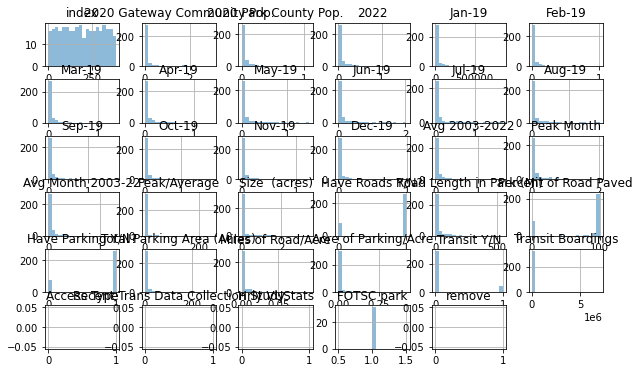

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\extmath.py:1050: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\extmath.py:1055: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\extmath.py:1075: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count
No handles with labels found to put in legend.


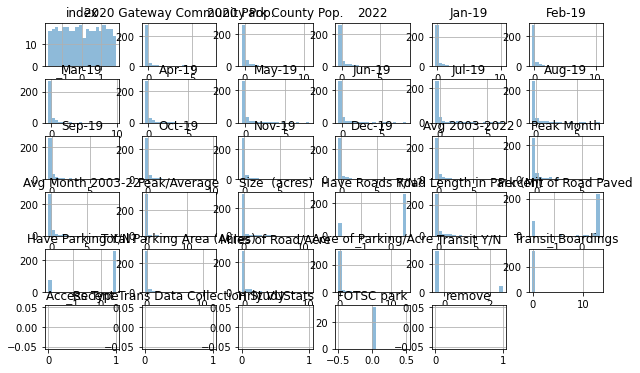

In [39]:
#standard scaling of data

import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

numerical_cols=df.select_dtypes(include=['float64','int64']).columns

df[numerical_cols].hist(alpha=0.5,bins=20, figsize=(10,6), label='Before Normalization')
plt.title('Histograms Before Normalization')
plt.legend()
plt.show()

scaler = StandardScaler()
df_scaled = df
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols].values)

df[numerical_cols].hist(alpha=0.5, bins=20, figsize=(10,6), label='After Normalization')
plt.title('Histogram After Normalization')
plt.legend()
plt.show()

In [40]:
kmeans = KMeans(
    init="random",
     n_clusters=10,
     n_init='auto',
     max_iter=300,
     random_state=42
)

In [41]:
kmeans.fit(df_scaled[['2020 Gateway Community Pop.', '2020 Park County Pop.',
               '2022','Avg 2003-2022','Peak Month','Avg Month 2003-22','Peak/Average',
        'Size  (acres)', 'Have Roads Y/N?','Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=10, n_init='auto', random_state=42)

In [42]:
df_scaled.head()

,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
0,-0.458783,Gateway National Recreation Area,Gateway,GATE,NER,0.898596,9.395628,4.539898,5.923253,5.577876,...,-0.127536,NaN,NaN,NaN,0.0,NaN,0,0,1,0
1,-0.269994,Great Smoky Mountains National Park,Great Smoky Mountains,GRSM,SER,-0.363606,-0.103500,6.939298,5.830753,4.244911,...,-0.127536,NaN,NaN,NaN,0.0,NaN,0,1,0,0
2,-1.429697,Blue Ridge Parkway,Blue Ridge Parkway,BLRI,SER,-0.130200,-0.183247,8.520168,3.960078,4.802614,...,-0.117652,NaN,NaN,NaN,0.0,NaN,0,1,0,0
3,-0.350903,Golden Gate National Recreation Area,Golden Gate,GOGA,PWR,1.868560,0.721413,8.479074,10.337556,10.639171,...,2.426813,NaN,NaN,NaN,NaN,NaN,0,0,1,0
4,0.170514,Lake Mead National Recreation Area,Lake Mead,LAKE,PWR,-0.334606,2.122436,2.744306,-0.338759,-0.378708,...,-0.127536,NaN,NaN,NaN,0.0,NaN,1,0,0,0


In [43]:
kmeans.labels_[:5]

array([1, 1, 1, 1, 9])

In [44]:
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
     "random_state": 42,
   }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_scaled[['2020 Gateway Community Pop.', '2020 Park County Pop.',
               '2022','Avg 2003-2022','Peak Month','Avg Month 2003-22','Peak/Average',
        'Size  (acres)', 'Have Roads Y/N?','Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])
    sse.append(kmeans.inertia_)

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\

In [45]:
sse

[5895.185074626866,
 4714.501697205629,
 3891.0079124504514,
 3607.2894565447536,
 3346.106247646049,
 3122.2425598879804,
 2801.8208358617812,
 2696.8725770560523,
 2524.107215800453,
 2388.3732599958753]

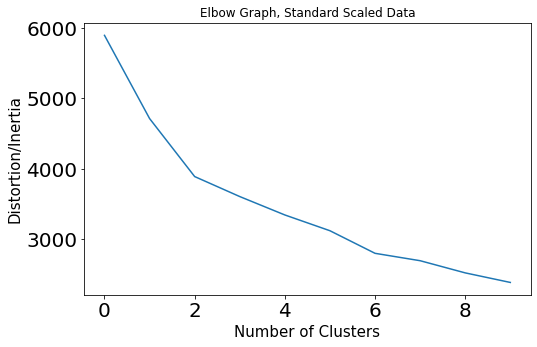

In [46]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.set_xlabel('Number of Clusters',fontsize = 15) #xlabel
ax.set_ylabel('Distortion/Inertia',fontsize = 15) #ylabel
ax.tick_params(axis='x', which='major', labelsize=20)
ax.tick_params(axis='y', which='major', labelsize=20)
plt.title('Elbow Graph, Standard Scaled Data')
plt.plot(sse)
plt.show()

In [47]:
kmeans = KMeans(
    init="random",
     n_clusters=6,
     n_init=10,
     max_iter=300,
     random_state=42
)
kmeans.fit(df_scaled[['2022', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
       'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
       'Dec-19', 'Avg 2003-2022','Peak Month','Avg Month 2003-22','Peak/Average',
        'Size  (acres)', 'Have Roads Y/N?','Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=6, n_init=10, random_state=42)

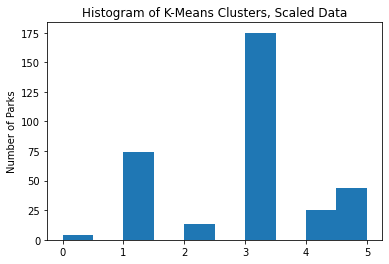

In [48]:
plt.hist(kmeans.labels_)
plt.title("Histogram of K-Means Clusters, Scaled Data")
plt.xlabel("")
plt.ylabel("Number of Parks")
plt.show()

In [49]:
df_scaled['cluster'] = kmeans.labels_

df_scaled = df_scaled.sort_values(by=['cluster'])

In [50]:
print(len(df_scaled.loc[df_scaled['cluster']==0]), " in cluster 0")
df_scaled[df_scaled['cluster']==0]

4  in cluster 0


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
0,-0.458783,Gateway National Recreation Area,Gateway,GATE,NER,0.898596,9.395628,4.539898,5.923253,5.577876,...,-0.127536,NaN,NaN,NaN,0.0,NaN,0,0,1,0
1,-0.269994,Great Smoky Mountains National Park,Great Smoky Mountains,GRSM,SER,-0.363606,-0.103500,6.939298,5.830753,4.244911,...,-0.127536,NaN,NaN,NaN,0.0,NaN,0,1,0,0
2,-1.429697,Blue Ridge Parkway,Blue Ridge Parkway,BLRI,SER,-0.130200,-0.183247,8.520168,3.960078,4.802614,...,-0.117652,NaN,NaN,NaN,0.0,NaN,0,1,0,0
3,-0.350903,Golden Gate National Recreation Area,Golden Gate,GOGA,PWR,1.868560,0.721413,8.479074,10.337556,10.639171,...,2.426813,NaN,NaN,NaN,NaN,NaN,0,0,1,0


In [51]:
print(len(df_scaled.loc[df_scaled['cluster']==1]), " in cluster 1")
df_scaled[df_scaled['cluster']==1]

74  in cluster 1


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
80,0.269403,Little Rock Central High School National Histo...,Little Rock Central High School,CHSC,MWR,0.146778,-0.047916,-0.382878,-0.328097,-0.269390,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,1,0,1
135,0.988599,River Raisin National Battlefield Park,River Raisin,RIRA,MWR,-0.320304,-0.302893,-0.297438,-0.141616,-0.248950,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,1,0,1
78,0.287383,Lowell National Historical Park,Lowell,LOWE,NER,-0.076434,1.238761,-0.316086,-0.035344,0.043219,...,-0.093223,NaN,NaN,NaN,NaN,NaN,0,0,1,1
136,0.979609,Rio Grande Wild and Scenic River,Rio Grande,RIGR,IMR,-0.348298,-0.454495,-0.435232,-0.349222,-0.386956,...,-0.127536,NaN,NaN,NaN,NaN,NaN,1,0,0,1
76,0.314353,Maggie L. Walker National Historic Site,Maggie L. Walker,MALW,NER,0.208376,-0.227959,-0.432637,-0.332426,-0.369932,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,0.539102,Natchez National Historical Park,Natchez,NATC,SER,-0.335542,-0.433630,-0.398506,-0.272186,-0.281582,...,-0.127536,NaN,NaN,NaN,NaN,NaN,1,0,0,1
41,0.655971,Niobrara National Scenic River,Niobrara,NIOB,MWR,-0.366027,-0.458764,-0.389740,-0.049390,-0.072645,...,-0.127536,NaN,NaN,NaN,NaN,NaN,1,0,0,1
40,0.682941,Obed Wild and Scenic River,Obed,OBED,SER,-0.370605,-0.442504,-0.260670,-0.217445,-0.242349,...,-0.127536,NaN,NaN,NaN,NaN,NaN,1,0,0,1
326,-0.593632,Fort Smith National Historic Site,Fort Smith,FOSM,MWR,-0.144169,-0.331082,-0.365139,-0.293734,-0.312928,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,1,0,1


In [52]:
print(len(df_scaled.loc[df_scaled['cluster']==2]), " in cluster 2")
df_scaled[df_scaled['cluster']==2]

13  in cluster 2


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
87,1.465067,Ulysses S. Grant National Historic Site,Ulysses S. Grant,ULSG,MWR,2.202364,0.583485,-0.416939,-0.348214,-0.372854,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,0,1,2
187,-1.195959,Castillo de San Marcos National Monument,Castillo de San Marcos,CASA,SER,-0.336032,-0.179101,-0.079211,-0.285946,0.292849,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,1,0,2
330,-0.629592,Fort Point National Historic Site,Fort Point,FOPO,PWR,1.868560,0.447645,0.109244,0.155080,0.240305,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,0,1,2
332,-0.647572,Fort McHenry National Monument and Historic Sh...,Fort McHenry,FOMC,NER,1.129306,0.146810,-0.307722,-0.343250,-0.182028,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,0,1,2
97,1.366177,Thomas Edison National Historical Park,Thomas Edison,EDIS,NER,-0.247519,0.436962,-0.416517,-0.324949,-0.366055,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,0,1,2
207,-1.061109,Christiansted National Historic Site,Christiansted,CHRI,SER,-0.368241,-0.373509,-0.380325,-0.257257,-0.274366,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,0,1,2
220,-1.636466,Andrew Johnson National Historic Site,Andrew Johnson,ANJO,SER,-0.333083,-0.391244,-0.405243,-0.316215,-0.349042,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,1,0,2
63,0.233444,Lincoln Home National Historic Site,Lincoln Home,LIHO,MWR,-0.079409,-0.259546,-0.352647,-0.349296,-0.384254,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,1,0,2
305,-0.791411,Eugene O'Neill National Historic Site,Eugene O'Neill,EUON,PWR,-0.261011,0.752348,-0.424691,-0.349234,-0.386012,...,-0.124870,NaN,NaN,NaN,NaN,NaN,0,1,0,2
240,-1.384747,Boston National Historical Park,Boston,BOST,NER,1.359961,0.368299,0.774906,0.333697,0.523928,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,0,1,2


In [53]:
print(len(df_scaled.loc[df_scaled['cluster']==3]), " in cluster 3")
df_scaled[df_scaled['cluster']==3]

175  in cluster 3


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
211,-1.312828,Cane River Creole National Historical Park,Cane River Creole,CARI,SER,-0.326518,-0.425305,-0.426939,-0.348786,-0.372524,...,-0.127536,NaN,NaN,NaN,NaN,NaN,1,0,0,3
210,-1.303838,Canyon de Chelly National Monument,Canyon de Chelly,CACH,IMR,-0.361052,-0.395555,-0.233041,-0.095385,-0.165773,...,-0.127536,NaN,NaN,NaN,NaN,NaN,1,0,0,3
235,-1.339798,Cabrillo National Monument,Cabrillo,CABR,PWR,3.184098,2.978121,0.002435,-0.264622,0.230244,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,0,1,3
182,-1.231918,Carl Sandburg Home National Historic Site,Carl Sandburg Home,CARL,SER,-0.363840,-0.343102,-0.390280,-0.347281,-0.336839,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,1,0,3
202,-1.007170,Coronado National Memorial,Coronado,CORO,IMR,-0.372780,-0.333536,-0.360505,-0.249195,-0.327086,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1.258298,Springfield Armory National Historic Site,Springfield Armory,SPAR,NER,0.027110,0.021695,-0.427124,-0.348600,-0.376775,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,0,1,3
31,0.763851,Pea Ridge National Military Park,Pea Ridge,PERI,MWR,-0.371259,-0.167717,-0.388645,-0.310729,-0.336158,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,1,0,3
29,0.781830,Pecos National Historical Park,Pecos,PECO,IMR,-0.369210,-0.436069,-0.407061,-0.347903,-0.373172,...,-0.127536,NaN,NaN,NaN,NaN,NaN,1,0,0,3
152,1.231328,Shiloh National Military Park,Shiloh,SHIL,SER,-0.372362,-0.400200,-0.214668,-0.092611,-0.153439,...,-0.127536,NaN,NaN,NaN,NaN,NaN,1,0,0,3


In [54]:
print(len(df_scaled.loc[df_scaled['cluster']==4]), " in cluster 4")
df_scaled[df_scaled['cluster']==4]

25  in cluster 4


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
58,0.026675,Joshua Tree National Park,Joshua Tree,JOTR,PWR,-0.300805,4.336108,1.307900,2.089080,2.481639,...,-0.127536,NaN,NaN,NaN,0.0,NaN,1,0,0,4
19,0.485162,Montezuma Castle National Monument,Montezuma Castle,MOCA,IMR,-0.341628,-0.217941,-0.227887,0.875969,0.881833,...,-0.127536,NaN,NaN,NaN,NaN,NaN,1,0,0,4
38,0.700921,Olympic National Park,Olympic,OLYM,PWR,-0.321591,-0.201989,0.951455,0.555486,0.422541,...,-0.127536,NaN,NaN,NaN,0.0,NaN,1,0,0,4
279,-0.081205,Independence National Historical Park,Independence,INDE,NER,3.740262,1.209326,1.096998,0.393216,1.584824,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,0,1,4
47,0.188494,Lake Roosevelt National Recreation Area,Lake Roosevelt,LARO,PWR,-0.369674,-0.293695,0.208012,5.419797,5.459574,...,-0.127536,NaN,NaN,NaN,NaN,NaN,1,0,0,4
45,0.206474,Lava Beds National Monument,Lava Beds,LABE,PWR,-0.370467,-0.409378,-0.360727,0.864026,1.037423,...,-0.127536,NaN,NaN,NaN,NaN,NaN,1,0,0,4
5,0.548092,Natchez Trace Parkway,Natchez Trace,NATR,SER,-0.275524,0.405251,3.294548,5.692644,4.802965,...,-0.127536,NaN,NaN,NaN,0.0,NaN,0,1,0,4
178,-1.106059,Chattahoochee River National Recreation Area,Chattahoochee River,CHAT,SER,-0.095602,0.648801,1.581254,2.193536,1.082576,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,0,1,4
334,1.752745,Zion National Park,Zion,ZION,IMR,-0.371462,-0.208521,2.239379,0.880237,0.735710,...,8.303647,NaN,NaN,NaN,0.0,NaN,1,0,0,4
149,1.267288,Statue of Liberty National Monument,Statue of Liberty,STLI,NER,3.972237,1.303727,1.355165,1.587677,1.312184,...,13.323972,NaN,NaN,NaN,NaN,NaN,0,0,1,4


In [55]:
print(len(df_scaled.loc[df_scaled['cluster']==5]), " in cluster 5")
df_scaled[df_scaled['cluster']==5]

44  in cluster 5


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
153,1.222338,Shenandoah National Park,Shenandoah,SHEN,NER,-0.360390,-0.068071,0.390745,-0.097425,-0.274816,...,-0.127536,NaN,NaN,NaN,0.0,NaN,0,1,0,5
151,1.249308,Sleeping Bear Dunes National Lakeshore,Sleeping Bear Dunes,SLBE,MWR,-0.369892,-0.422429,0.420282,-0.216636,-0.257616,...,-0.106973,NaN,NaN,NaN,NaN,NaN,1,0,0,5
154,1.213348,Sequoia National Park,Sequoia,SEQU,NaN,-0.367515,0.029305,0.221962,0.098883,-0.071920,...,-0.127536,NaN,NaN,NaN,0.0,NaN,1,0,0,5
200,-0.989190,Crater Lake National Park,Crater Lake,CRLA,PWR,-0.372780,-0.392015,-0.134835,-0.310480,-0.360794,...,-0.127536,NaN,NaN,NaN,NaN,NaN,1,0,0,5
316,-0.467773,Gateway Arch National Park,Gateway Arch,JEFF,MWR,7.361379,-0.149719,0.487348,-0.113387,0.177172,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,0,1,5
160,1.159408,San Juan National Historic Site,San Juan,SAJU,SER,0.504966,-0.107263,0.150177,1.282297,0.870970,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,0,1,5
271,-0.216054,Haleakala National Park,Haleakala,HALE,PWR,-0.354066,-0.292514,0.184579,0.316591,0.531386,...,-0.127536,NaN,NaN,NaN,NaN,NaN,1,0,0,5
195,-0.944240,Cuyahoga Valley National Park,Cuyahoga Valley,CUVA,MWR,-0.337812,0.855553,1.225258,0.745773,0.513758,...,0.065744,NaN,NaN,NaN,NaN,NaN,0,1,0,5
20,0.584052,Natural Bridges National Monument,Natural Bridges,NABR,IMR,-0.372780,-0.449306,-0.394768,-0.108548,-0.194824,...,-0.127536,NaN,NaN,NaN,NaN,NaN,1,0,0,5
163,1.132439,San Antonio Missions National Historical Park,San Antonio Missions,SAAN,IMR,3.306409,1.632549,0.270825,0.875770,0.624624,...,-0.127536,NaN,NaN,NaN,NaN,NaN,0,1,0,5


In [56]:
print(len(df_scaled.loc[df_scaled['cluster']==6]), " in cluster 6")
df_scaled[df_scaled['cluster']==6]

0  in cluster 6


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster


In [57]:
print(len(df_scaled.loc[df_scaled['cluster']==7]), " in cluster 7")
df_scaled[df_scaled['cluster']==7]

0  in cluster 7


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster


In [58]:
df_scaled.to_excel(r"C:\Users\Jonathan.Robison\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Enhancing Trip Planning Information\NPS Park cluster result 25_01_22_scaledclusters.xlsx")

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Jonathan.Robison\\DOT OST\\volpe-proj-VU16A100 - Emerging Mobility\\Subgroup Support\\Traveler Information Technologies\\Enhancing Trip Planning Information\\NPS Park cluster result 25_01_22_scaledclusters.xlsx'

In [ ]:
#logarithmic scaling of data

import pandas as pd
import numpy as np

columns_to_log_scale = ['2012',
       '2016', '2019', '2022', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
       'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
       'Dec-19', 'Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22',
       'Jul-22', 'Aug-22', 'Sept-22', 'Oct-22', 'Nov-22', 'Dec-22',
       'Avg 2003-2022', 'Size  (acres)', 'Have Roads Y/N?',
       'Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']

df_log = df
df_log[columns_to_log_scale] = np.log10(df_log[columns_to_log_scale].replace(0,1))

print(df_log)



In [ ]:
kmeans = KMeans(
    init="random",
     n_clusters=10,
     n_init='auto',
     max_iter=300,
     random_state=42
)

In [ ]:
df_log.head()

In [ ]:
df_log = df.fillna(0)

df_log.head()

In [ ]:
kmeans.fit(df_log[['2012','2016', '2019', '2022', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
       'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
       'Dec-19', 'Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22',
       'Jul-22', 'Aug-22', 'Sept-22', 'Oct-22', 'Nov-22', 'Dec-22',
       'Avg 2003-2022', 'Size  (acres)', 'Have Roads Y/N?',
       'Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])

In [ ]:
kmeans.labels_[:5]

In [ ]:
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
     "random_state": 42,
   }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_log[['2012',
       '2016', '2019', '2022', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
       'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
       'Dec-19', 'Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22',
       'Jul-22', 'Aug-22', 'Sept-22', 'Oct-22', 'Nov-22', 'Dec-22',
       'Avg 2003-2022', 'Size  (acres)', 'Have Roads Y/N?',
       'Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings', 'rural', 'suburban', 'urban']])
    sse.append(kmeans.inertia_)

In [ ]:
sse

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.set_xlabel('Number of Clusters',fontsize = 15) #xlabel
ax.set_ylabel('Distortion/Inertia',fontsize = 15) #ylabel
ax.tick_params(axis='x', which='major', labelsize=20)
ax.tick_params(axis='y', which='major', labelsize=20)
plt.title('Elbow Plot of K-Means Custers, Logarithmac Scaled Data')
plt.plot(sse)
plt.show()

In [ ]:
kmeans = KMeans(
    init="random",
     n_clusters=3,
     n_init=10,
     max_iter=300,
     random_state=42
)
kmeans.fit(df_log[['2012',
       '2016', '2019', '2022', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
       'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
       'Dec-19', 'Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22',
       'Jul-22', 'Aug-22', 'Sept-22', 'Oct-22', 'Nov-22', 'Dec-22',
       'Avg 2003-2022', 'Size  (acres)', 'Have Roads Y/N?',
       'Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings', 'rural', 'suburban', 'urban']])

In [ ]:
df_log['log_cluster'] = kmeans.labels_

In [ ]:
df_log = df_log.sort_values(by=['log_cluster'])

In [ ]:
df_log.head()

In [ ]:
plt.hist(kmeans.labels_)
plt.title("Histogram of K-Means Clusters, Logarithmic Scale")
plt.xlabel("")
plt.ylabel("Number of Parks")
plt.show()

In [ ]:
print(len(df_log.loc[df_log['log_cluster']==0]), " in cluster 0")
df_log.loc[df_log['log_cluster']==0]

In [ ]:
print(len(df_log.loc[df_log['log_cluster']==1]), " in cluster 1")
df_log.loc[df_log['log_cluster']==1]

In [ ]:
print(len(df_log.loc[df_log['log_cluster']==2]), " in cluster 2")
df_log.loc[df_log['log_cluster']==2]

In [ ]:
print(len(df_log.loc[df_log['log_cluster']==3]), " in cluster 3")
df_log.loc[df_log['log_cluster']==3]

In [ ]:
df_log.to_excel(r"C:\Users\Jonathan.Robison\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Enhancing Trip Planning Information\NPS Park Cluster Log Result 01_03.xlsx")

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

#scoring the fit of the clusters

#Davies-Bouldin Index

db_index = davies_bouldin_score(df_log, kmeans.label_)
print(f"Davies-Bouldin Index: {db_index}")

In [ ]:
#Scoring the fit of the clusters

silhouette_avg = silhouette_score(df_log, kmeans.labels_)
print(f"Silhouette Score:{silhouette_avg}")